In [19]:
from Bio import SeqIO

# Define the input file (regular FASTQ, not gzipped)
input_file = "/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/p006/barcode_fragment/unique_fragments.fasta"
# Define the length of the sequences
length = 21

# Extract sequences
sequences = []
with open(input_file, "r") as handle:  # Use open instead of gzip.open
    for record in SeqIO.parse(handle, "fasta"):
        sequences.append(str(record.seq))
        
# Only keep sequences of the specified length
sequences = [seq for seq in sequences if len(seq) == length]
print(len(sequences))

2408694


In [20]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# Load sequences into a pandas DataFrame
sequence_df = pd.DataFrame([list(seq) for seq in sequences])

# Count occurrences of each nucleotide
counts_df = sequence_df.apply(pd.Series.value_counts).fillna(0)

# Convert counts to a probability matrix
probability_df = counts_df.div(counts_df.sum(axis=0), axis=1)

# transpose the matrix
probability_df = probability_df.T

probability_df.head()

,A,C,G,T
0,0.291267,0.194913,0.222451,0.291369
1,0.282657,0.182584,0.198351,0.336409
2,0.020400,0.152555,0.343126,0.483918
3,0.263958,0.218837,0.217804,0.299400
4,0.287110,0.179359,0.209009,0.324522


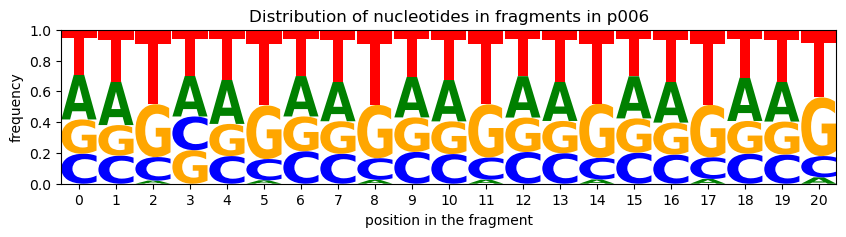

In [21]:
import matplotlib.pyplot as plt

# Create the logo
logo = logomaker.Logo(probability_df, figsize=(10, 2))

# Style the ticks (optional)
logo.style_xticks(anchor=0, spacing=1)

# Add title, x-label, and y-label
plt.title("Distribution of nucleotides in fragments in p006")
plt.xlabel("position in the fragment")
plt.ylabel("frequency")
plt.savefig("plots/logos/frag_dist_p006.png", dpi=300)
# Display the plot
plt.show()
